Q1:How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

The resulting matrix multiplication of (n,k) and (k,m) is (n,m).The number of additions and multiplications to get a(ij) (a single element in the matrix) is k-1 and k.Now, to get complete number of additions and multiplication we need to multiply k-1 and k with n and m. Therefore the total mulplication and addition to get the resulting matrix is n*m*k and n*m*(k-1) respectively. 

Q2:Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [15]:
import numpy as np
import time
import random

def matrix_mult(A, B):
    return [[sum(a*b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def numpy_mult(A, B):
    return np.dot(A, B)

n=50
k=1
m=50
A = [[random.randint(1, 10) for _ in range(k)] for _ in range(n)]
B = [[random.randint(1, 10) for _ in range(m)] for _ in range(k)]

start = time.time()
result = matrix_mult(A, B)
end = time.time()
print("Time for matrix_mult: ", end - start)

start = time.time()
result = numpy_mult(A, B)
end = time.time()
print("Time for numpy_mult: ", end - start)


Time for matrix_mult:  0.003000020980834961
Time for numpy_mult:  0.0009999275207519531


The numpy dot function is much faster than nested loops because numpy is implemented by C language which is faster than python .

Q3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

The time coomplexity of finding the median of the array is O(n).We can use quickselect and if the array is of odd length then median the middle number and if the array has even number then the median is the average of two middle number.The time complexity of this is O(n).It is more efficient than sorting the entire array for finding the median.

In [12]:
import time

start=time.time()
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickselect(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)
        
        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quickselect(arr, pivot_index + 1, high, k)
        else:
            return quickselect(arr, low, pivot_index - 1, k)

def find_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, n // 2)
    else:
        mid_left = quickselect(arr, 0, n - 1, n // 2 - 1)
        mid_right = quickselect(arr, 0, n - 1, n // 2)
        return (mid_left + mid_right) / 2

arr = [3,4,5,6,2,1,9]
print(find_median(arr))
end = time.time()
print('Time taken in quickselect:', end-start)

4
Time taken in quickselect: 0.0019998550415039062


Q4: What is the gradient of the following function with respect to x and y?

$f(x, y) = x^2y + y^3\sin(x)$


The answer is:
$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)=\left(2xy - y^3\cos(x), x^2 + 3y^2\sin(x)\right)\$$

Q7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [78]:
students_data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N',
                'Marks': {'Maths': 100,'English': 70,}
            },
        },
        'Branch 2': {
            1: {'Name': 'N',
                'Marks': {'Maths': 100,'English': 70,}
                
             },
        },
    2023: {
    
}}}

for year, branches in students_data.items():
    print(year)
    for branch, roll_numbers in branches.items():
        print(f"{branch}")
        for roll_number, student_info in roll_numbers.items():
            print(f"  Roll Number: {roll_number}, Name: {student_info['Name']}, Marks:")
            for subject, mark in student_info['Marks'].items():
                print(f"    {subject}: {mark}")


2022
Branch 1
  Roll Number: 1, Name: N, Marks:
    Maths: 100
    English: 70
Branch 2
  Roll Number: 1, Name: N, Marks:
    Maths: 100
    English: 70
2023


Q8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [49]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_mark(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

year2022 = Year(2022)

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "N"))
branch1_2022.students[0].add_mark("Maths", 100)
branch1_2022.students[0].add_mark("English", 70)

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(2, "M"))

year2022.add_branch(branch1_2022)
year2022.add_branch(branch2_2022)


for year in [year2022]:  
    print(year.year)
    for branch in year.branches:
        print(f"{branch.name}")
        for student in branch.students:
            print(f"  Roll Number: {student.roll_number}, Name: {student.name}, Marks:")
            for subject, mark in student.marks.items():
                print(f"    {subject}: {mark}")


2022
Branch 1
  Roll Number: 1, Name: N, Marks:
    Maths: 100
    English: 70
Branch 2
  Roll Number: 2, Name: M, Marks:


Q9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


$$ (1) y = x $$\]


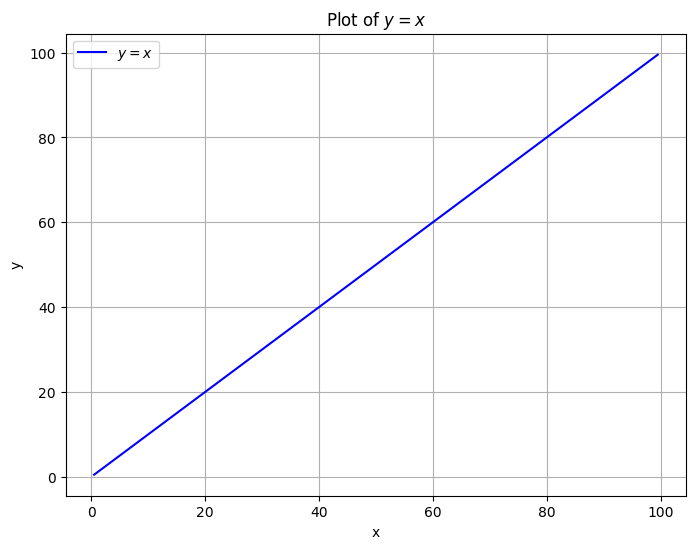

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_x(x):
    return x

x_values = np.arange(0.5, 100.0, 0.5)
y_values = y_equals_x(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = x$', color='blue')
plt.title('Plot of $y = x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ (2) y=x^2 $$

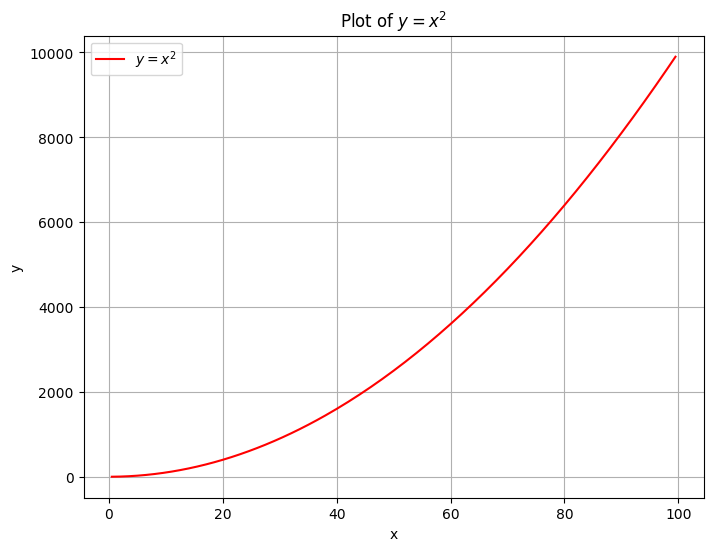

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_x_squared(x):
    return x**2
x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_x_squared(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = x^2$', color='red')
plt.title('Plot of $y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ (3) y=x^3/100$$

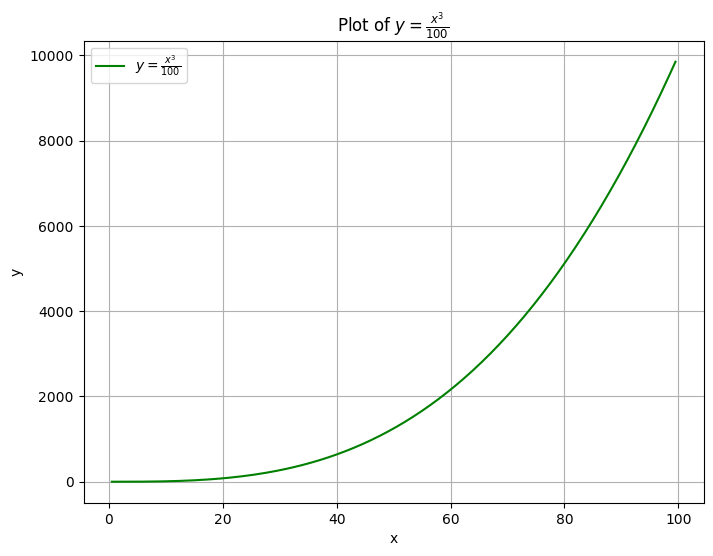

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_x_cubed_over_100(x):
    return (x**3) / 100

x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_x_cubed_over_100(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = \\frac{x^3}{100}$', color='green')
plt.title('Plot of $y = \\frac{x^3}{100}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ (4) y=sin(x) $$

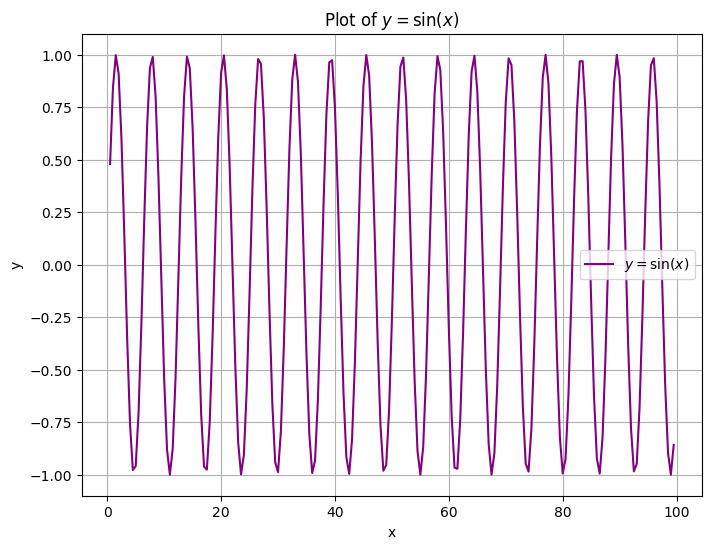

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_sin(x):
    return np.sin(x)

x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_sin(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = \\sin(x)$', color='purple')
plt.title('Plot of $y = \\sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ (5) y =sin(x)/x$$


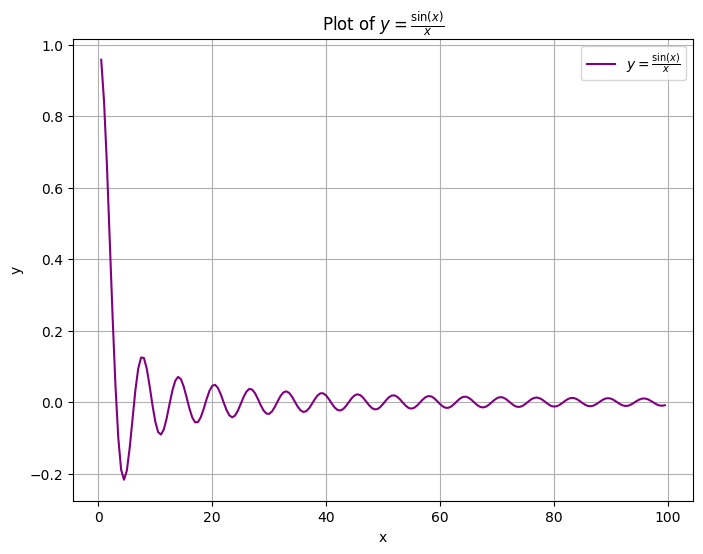

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_sin_over_x(x):
    return np.where(x != 0, np.sin(x) / x, 1)  

x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_sin_over_x(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = \\frac{\\sin(x)}{x}$', color='purple')
plt.title('Plot of $y = \\frac{\\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ y = log(x) $$

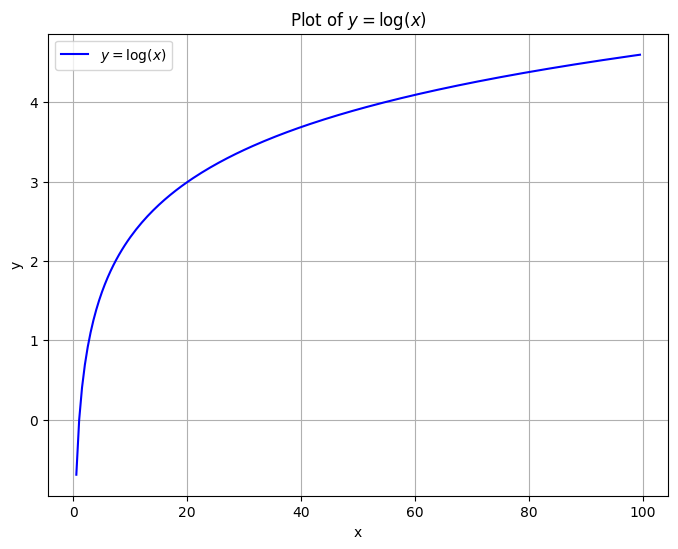

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_logx(x):
    return np.where(x > 0, np.log(x), np.nan)

x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_logx(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = \\log(x)$', color='blue')
plt.title('Plot of $y = \\log(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


$$ y = e^x$$

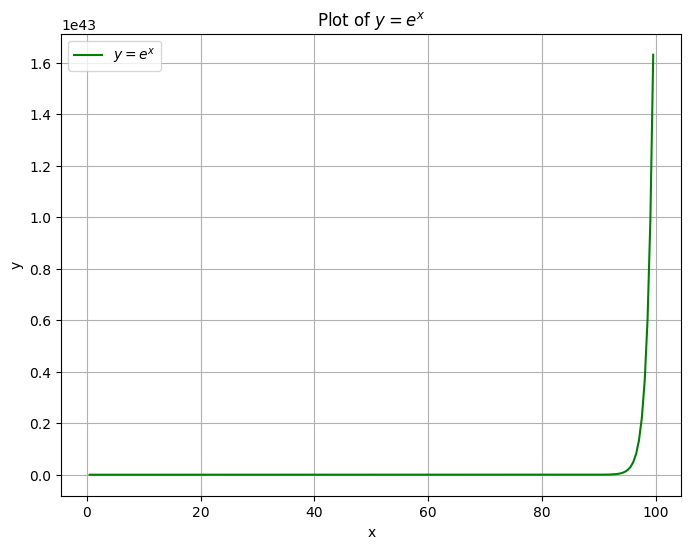

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def y_equals_exp(x):
    return np.exp(x)

x_values = np.arange(0.5, 100.0, 0.5)

y_values = y_equals_exp(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = e^x$', color='green')
plt.title('Plot of $y = e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Q10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [63]:
import numpy as np
import pandas as pd

np.random.seed(42)

matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

max_std_column = df.std().idxmax()

min_mean_row = df.mean(axis=1).idxmin()

print("Generated DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


Generated DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1

Q11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [65]:
import numpy as np
import pandas as pd

np.random.seed(42)

matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = df[df['g'] == 'LT8'].shape[0]

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Updated DataFrame:")
print(df)

print("\nNumber of rows where the value in the column 'g' is 'LT8':", lt8_count)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802

Q11: Write a small piece of code to explain broadcasting in numpy

In [67]:
import numpy as np

matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

row_addition = np.array([10, 20, 30])
result = matrix + row_addition

print("Original Matrix:")
print(matrix)
print("\n1D Array for Broadcasting:")
print(row_addition)
print("\nResult after Broadcasting:")
print(result)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

1D Array for Broadcasting:
[10 20 30]

Result after Broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Q13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [68]:
import numpy as np

def custom_argmin(arr):
    if len(arr) == 0:
        raise ValueError("Input array is empty")
        
    min_value = arr[0]
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

arr = np.array([5, 2, 8, 1, 7, 3])
custom_result = custom_argmin(arr)
numpy_result = np.argmin(arr)

assert custom_result == numpy_result

print("Custom argmin result:", custom_result)
print("Numpy argmin result:", numpy_result)


Custom argmin result: 3
Numpy argmin result: 3
